## Work
1. 試比較有 BN 在 Batch_size = 2, 16, 32, 128, 256 下的差異
2. 請嘗試將 BN 放在 Activation 之前，並比較訓練結果
3. 請於 BN 放在 Input Layer 後，並比較結果

In [1]:
import os
import keras
from keras.layers import BatchNormalization

# Disable GPU
#os.environ["CUDA_VISIBLE_DEVICES"] = ""

Using TensorFlow backend.


In [2]:
train, test = keras.datasets.cifar10.load_data()

In [3]:
## 資料前處理
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    

In [4]:
x_train, y_train = train
x_test, y_test = test

# Preproc the inputs
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# Preprc the outputs
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [5]:
def build_mlp(input_shape, output_units=10, num_neurons=[512, 256, 128]):
    input_layer = keras.layers.Input(input_shape)
    
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=n_units, 
                                   activation="relu", 
                                   name="hidden_layer"+str(i+1))(input_layer)
            x = BatchNormalization()(x)
        else:
            x = keras.layers.Dense(units=n_units, 
                                   activation="relu", 
                                   name="hidden_layer"+str(i+1))(x)
            x = BatchNormalization()(x)
    
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

In [6]:
# test 2
def build_mlp(input_shape, output_units=10, num_neurons=[512, 256, 128]):
    input_layer = keras.layers.Input(input_shape)
    
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=n_units, 
                                   activation="relu", 
                                   name="hidden_layer"+str(i+1))(input_layer)
        else:
            x = keras.layers.Dense(units=n_units, 
                                   activation="relu", 
                                   name="hidden_layer"+str(i+1))(x)
            
    x = BatchNormalization()(x)
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

In [8]:
# test 3
def build_mlp(input_shape, output_units=10, num_neurons=[512, 256, 128]):
    input_layer = keras.layers.Input(input_shape)

    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=n_units, 
                                   activation="relu", 
                                   name="hidden_layer"+str(i+1))(input_layer)
        else:
            x = keras.layers.Dense(units=n_units, 
                                   activation="relu", 
                                   name="hidden_layer"+str(i+1))(x)
    
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

In [6]:
"""Code Here
設定超參數
"""
LEARNING_RATE = 1e-3
EPOCHS = 50
# BATCH_SIZE = [2, 16, 32, 128, 256]
BATCH_SIZE = [128, 256, 1024]
# BATCH_SIZE = 256
MOMENTUM = 0.95

In [7]:
results = {}
"""Code Here
撰寫你的訓練流程並將結果用 dictionary 紀錄
"""
for batch_sizes in BATCH_SIZE:
    keras.backend.clear_session() # 把舊的 Graph 清掉
    print("Experiment with batch_size = %f" % batch_sizes)

    model = build_mlp(input_shape=x_train.shape[1:])
    model.summary()
    optimizer = keras.optimizers.SGD(lr=LEARNING_RATE, nesterov=True, momentum=MOMENTUM)
    model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

    model.fit(x_train, y_train, 
              epochs=EPOCHS, 
              batch_size=batch_sizes, 
              validation_data=(x_test, y_test), 
              shuffle=True)
    
    # Collect results
    train_loss = model.history.history["loss"]
    valid_loss = model.history.history["val_loss"]
    train_acc = model.history.history["accuracy"]
    valid_acc = model.history.history["val_accuracy"]
    
    exp_name_tag = "exp-batch_size-%s" % str(batch_sizes)
    results[exp_name_tag] = {'train-loss': train_loss,
                             'valid-loss': valid_loss,
                             'train-acc': train_acc,
                             'valid-acc': valid_acc}

Experiment with batch_size = 128.000000
Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
batch_normalization_1 (Batch (None, 512)               2048      
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
batch_normalization_2 (Batch (None, 256)               1024      
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
batch_normalization

50000/50000 [==============================] - 5s 95us/step - loss: 0.3012 - accuracy: 0.8975 - val_loss: 2.3586 - val_accuracy: 0.4799
Epoch 47/50
50000/50000 [==============================] - 5s 93us/step - loss: 0.2936 - accuracy: 0.8994 - val_loss: 2.3659 - val_accuracy: 0.4672
Epoch 48/50
50000/50000 [==============================] - 6s 118us/step - loss: 0.2902 - accuracy: 0.9040 - val_loss: 2.3995 - val_accuracy: 0.4533
Epoch 49/50
50000/50000 [==============================] - 5s 109us/step - loss: 0.2792 - accuracy: 0.9050 - val_loss: 2.4618 - val_accuracy: 0.4726
Epoch 50/50
50000/50000 [==============================] - 4s 90us/step - loss: 0.2782 - accuracy: 0.9038 - val_loss: 2.6458 - val_accuracy: 0.4503
Experiment with batch_size = 256.000000
Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_______________

50000/50000 [==============================] - 3s 66us/step - loss: 0.2784 - accuracy: 0.9146 - val_loss: 2.2235 - val_accuracy: 0.4543
Epoch 42/50
50000/50000 [==============================] - 3s 65us/step - loss: 0.2631 - accuracy: 0.9218 - val_loss: 2.2420 - val_accuracy: 0.4695
Epoch 43/50
50000/50000 [==============================] - 3s 67us/step - loss: 0.2533 - accuracy: 0.9247 - val_loss: 2.3354 - val_accuracy: 0.4629
Epoch 44/50
50000/50000 [==============================] - 3s 66us/step - loss: 0.2392 - accuracy: 0.9296 - val_loss: 2.3523 - val_accuracy: 0.4598
Epoch 45/50
50000/50000 [==============================] - 3s 65us/step - loss: 0.2255 - accuracy: 0.9339 - val_loss: 2.2564 - val_accuracy: 0.4706
Epoch 46/50
50000/50000 [==============================] - 3s 67us/step - loss: 0.2127 - accuracy: 0.9388 - val_loss: 2.3353 - val_accuracy: 0.4803
Epoch 47/50
50000/50000 [==============================] - 3s 66us/step - loss: 0.1980 - accuracy: 0.9453 - val_loss: 2.4164

50000/50000 [==============================] - 2s 46us/step - loss: 0.7329 - accuracy: 0.7665 - val_loss: 1.5290 - val_accuracy: 0.5002
Epoch 37/50
50000/50000 [==============================] - 2s 47us/step - loss: 0.7154 - accuracy: 0.7745 - val_loss: 1.5368 - val_accuracy: 0.4936
Epoch 38/50
50000/50000 [==============================] - 2s 46us/step - loss: 0.6978 - accuracy: 0.7827 - val_loss: 1.5458 - val_accuracy: 0.4931
Epoch 39/50
50000/50000 [==============================] - 2s 46us/step - loss: 0.6772 - accuracy: 0.7904 - val_loss: 1.5514 - val_accuracy: 0.4937
Epoch 40/50
50000/50000 [==============================] - 2s 46us/step - loss: 0.6588 - accuracy: 0.7974 - val_loss: 1.5800 - val_accuracy: 0.4870
Epoch 41/50
50000/50000 [==============================] - 2s 47us/step - loss: 0.6400 - accuracy: 0.8047 - val_loss: 1.5877 - val_accuracy: 0.4949
Epoch 42/50
50000/50000 [==============================] - 2s 46us/step - loss: 0.6207 - accuracy: 0.8145 - val_loss: 1.5792

In [9]:
# for test 2 and 3
keras.backend.clear_session() # 把舊的 Graph 清掉
print("Experiment with batch_size = %f" % BATCH_SIZE)

model = build_mlp(input_shape=x_train.shape[1:])
model.summary()
optimizer = keras.optimizers.SGD(lr=LEARNING_RATE, nesterov=True, momentum=MOMENTUM)
model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

model.fit(x_train, y_train, 
          epochs=EPOCHS, 
          batch_size=BATCH_SIZE, 
          validation_data=(x_test, y_test), 
          shuffle=True)
    
# Collect results
train_loss = model.history.history["loss"]
valid_loss = model.history.history["val_loss"]
train_acc = model.history.history["accuracy"]
valid_acc = model.history.history["val_accuracy"]

Experiment with batch_size = 256.000000
Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
output (Dense)               (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
_________________________________________________________________
Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [=

Epoch 49/50
50000/50000 [==============================] - 3s 56us/step - loss: 0.8721 - accuracy: 0.6942 - val_loss: 1.4333 - val_accuracy: 0.5228
Epoch 50/50
50000/50000 [==============================] - 3s 58us/step - loss: 0.8615 - accuracy: 0.6989 - val_loss: 1.3957 - val_accuracy: 0.5348


NameError: name 'results' is not defined

# 1.試比較有 BN 在 Batch_size = 2, 16, 32, 128, 256 下的差異

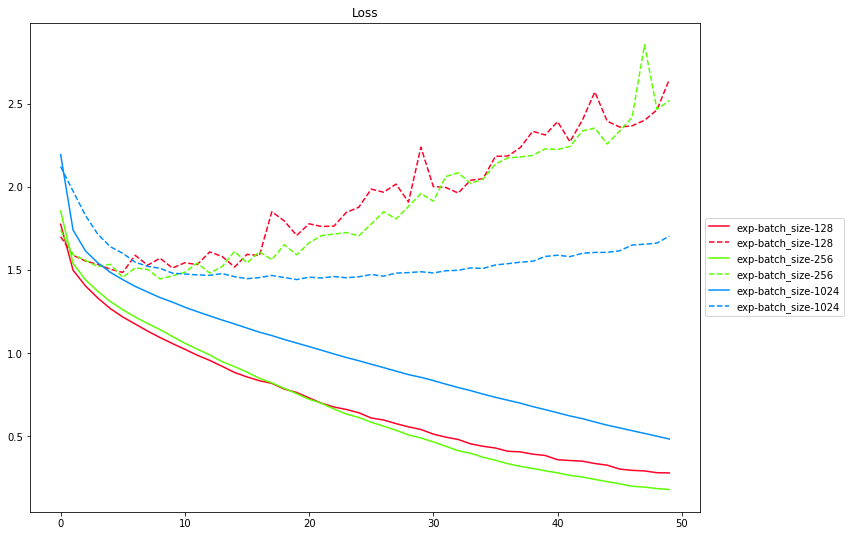

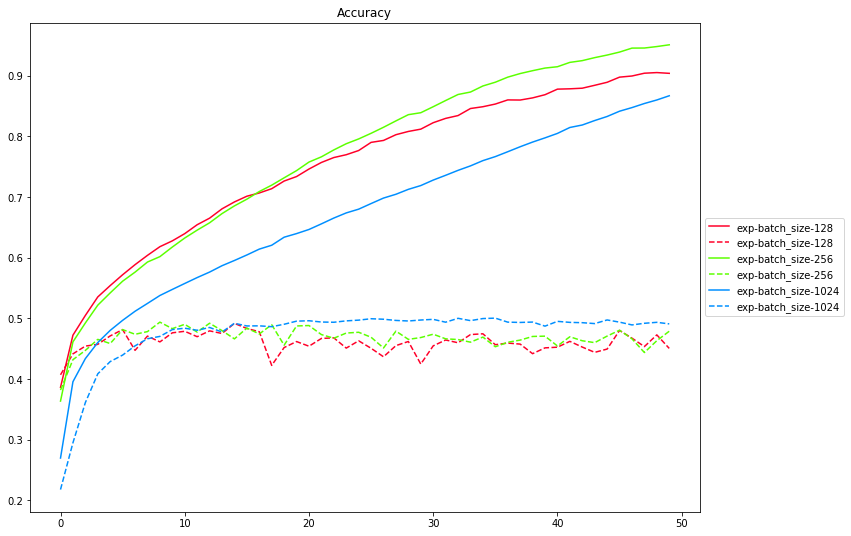

In [8]:
import matplotlib.pyplot as plt
%matplotlib inline
"""Code Here
將結果繪出
"""
NUM_COLORS = len(results.keys())
cm = plt.get_cmap('gist_rainbow')
color_bar = [cm(1.*i/NUM_COLORS) for i in range(NUM_COLORS)]

plt.figure(figsize=(12,9))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-loss'])),results[cond]['train-loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-loss'])),results[cond]['valid-loss'], '--', label=cond, color=color_bar[i])
plt.title("Loss")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

plt.figure(figsize=(12,9))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-acc'])),results[cond]['train-acc'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-acc'])),results[cond]['valid-acc'], '--', label=cond, color=color_bar[i])
plt.title("Accuracy")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

# 2.請嘗試將 BN 放在 Activation 之前，並比較訓練結果

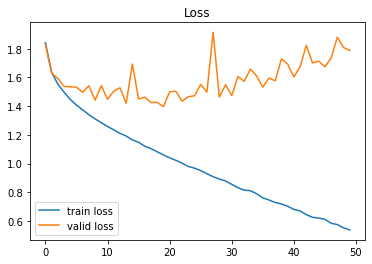

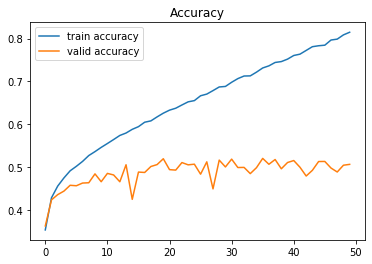

In [10]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(range(len(train_loss)), train_loss, label="train loss")
plt.plot(range(len(valid_loss)), valid_loss, label="valid loss")
plt.legend()
plt.title("Loss")
plt.show()

plt.plot(range(len(train_acc)), train_acc, label="train accuracy")
plt.plot(range(len(valid_acc)), valid_acc, label="valid accuracy")
plt.legend()
plt.title("Accuracy")
plt.show()

# 3.請於 BN 放在 Input Layer 後，並比較結果

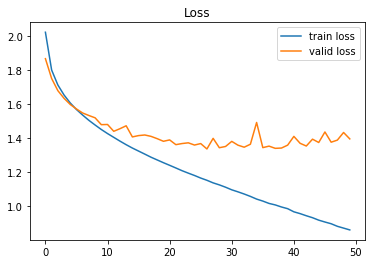

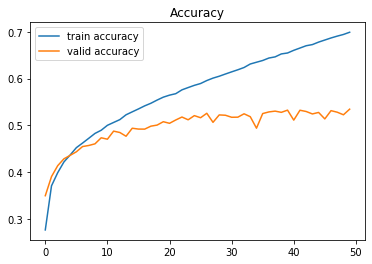

In [10]:
# 沒有BN的狀況
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(range(len(train_loss)), train_loss, label="train loss")
plt.plot(range(len(valid_loss)), valid_loss, label="valid loss")
plt.legend()
plt.title("Loss")
plt.show()

plt.plot(range(len(train_acc)), train_acc, label="train accuracy")
plt.plot(range(len(valid_acc)), valid_acc, label="valid accuracy")
plt.legend()
plt.title("Accuracy")
plt.show()